"""

#### Author: Girish Dev Kumar Chaurasiya
#### Date: 11 Nov 2023


#### Project objective: We have to go through a lot of job vacancies while looking for a position that appears to be 
#### matching our expectation and it happens mainly due to the mismatch in skillset. However understanding skillset by 
#### reading through 100s of job descriptions might not be as effective and can also leave us confused. 

#### This project will try to solve this problem by reading through job descriptions on Linkedin and identifying key skillsets 
#### ranking them in terms of importance

"""

In [30]:
# libraries # 

import requests, re, time
from bs4 import BeautifulSoup
import csv
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk 
import re

from sklearn import datasets, decomposition

In [2]:
# inputs # 

POSITION="Front%20End%20Developer"
LOCATION = "India"

LINK = "https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords={POSITION}&location={LOCATION}&start={start}".\
        format(POSITION=POSITION,
               LOCATION=LOCATION,
               start=1)
URL_LIST_PATH = "urls.csv"

In [4]:
def get_url_list(link, number_of_results=100):
    
    """
    
    This function is used to fetch links of jobs from linkedin search
    
    """
    
    web = requests.session()

    list_of_urls = []

    for x in range(number_of_results):
        req = web.get(link)
        time.sleep(0.2) # Don't spam
        list_temp = re.findall(r"href=\"(.*?)\"",req.text)
        list_temp_updated = [item_ for item_ in list_temp if '/jobs/' in item_]
        list_of_urls.extend(list_temp_updated)
        
        print("{} of {}".format(x, number_of_results))
        
    list_of_urls = np.unique(list_of_urls)
        
    return np.unique(list_of_urls)

In [5]:
def write_results_to_csv(unique_urls, path = URL_LIST_PATH):
    
    """
    This function is used for saving the urls tp 
    """
    with open(path, 'w', newline='\n') as csvfile:
        urlwriter = csv.writer(csvfile)
        for x in list(unique_urls):
            urlwriter.writerow([x])
            
    return 

In [6]:
write_results_to_csv(get_url_list(LINK, number_of_results=2), 
                     path = URL_LIST_PATH)

0 of 2
1 of 2


In [7]:
def get_job_advt_body(url_path = URL_LIST_PATH):
    
    """
    
    This function uses links to get the text body and save it in a dictionary
    
    """
    
    dict_temp = {}
    
    c = 1
    s = 1
    
    with open(url_path, newline='\n') as csvfile:
        
        urlReader = csv.reader(csvfile)
        for row in urlReader:
            time.sleep(0.2)
            content_ = requests.get(row[0])
            bs_content = BeautifulSoup(content_.content,'html.parser')
            jd_content = bs_content.findAll(attrs={'class':"show-more-less-html__markup show-more-less-html__markup--clamp-after-5 relative overflow-hidden"})
            if jd_content:
                updated_jd_content = jd_content[0].get_text("\n")
                updated_jd_content = updated_jd_content.encode("ascii", "ignore")
                updated_jd_content = updated_jd_content.decode()
                print("{} out of total urls".format(c))
                print("{} urls skipped".format(s-c))
                dict_temp[row[0]] = updated_jd_content
                c+=1
            s+=1
            
    return dict_temp          

In [9]:
DICT = get_job_advt_body(URL_LIST_PATH)

1 out of total urls
0 urls skipped
2 out of total urls
0 urls skipped
3 out of total urls
0 urls skipped
4 out of total urls
0 urls skipped
5 out of total urls
0 urls skipped
6 out of total urls
0 urls skipped
7 out of total urls
0 urls skipped
8 out of total urls
0 urls skipped
9 out of total urls
0 urls skipped
10 out of total urls
0 urls skipped
11 out of total urls
0 urls skipped
12 out of total urls
0 urls skipped
13 out of total urls
0 urls skipped
14 out of total urls
0 urls skipped
15 out of total urls
0 urls skipped
16 out of total urls
0 urls skipped
17 out of total urls
0 urls skipped
18 out of total urls
0 urls skipped
19 out of total urls
0 urls skipped
20 out of total urls
0 urls skipped
21 out of total urls
0 urls skipped
22 out of total urls
0 urls skipped
23 out of total urls
0 urls skipped
24 out of total urls
0 urls skipped
25 out of total urls
0 urls skipped
26 out of total urls
0 urls skipped
27 out of total urls
0 urls skipped
28 out of total urls
0 urls skipped
2

In [20]:
def get_dataset(DICT):
    
    " converts dictionary for job descriptions to dataframe for further processing "
    
    df = pd.DataFrame()
    df.index=list(range(len(DICT)))
    df['job_advt']= list(DICT.values())
    
    return df

In [21]:
df = get_dataset(DICT)

In [25]:
job_advt = df['job_advt']
display(string.punctuation)

def remove_punct(tweet):
    # Remove punctuation characters
#     tweet = "".join([char for char in tweet if char not in string.punctuation])
    # Remove numbers
    tweet = re.sub('[0-9]+', ' ', tweet)
    return tweet

job_advt = job_advt.apply(lambda x: remove_punct(x))
display(job_advt.head(10))

# Tokenize the text by splitting into words

def tokenization(tweet):
    tweet = re.split('\W+', tweet)
    return tweet

job_advt = job_advt.apply(lambda x: tokenization(x))
display(job_advt.head(10))

# Remove stopwords using NLTK stopwords list

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(tweet):
    tweet = [word for word in tweet if word not in stopwords]
    return tweet

job_advt = job_advt.apply(lambda x: remove_stopwords(x))
display(job_advt.head(10))

# Perform stemming using Porter Stemmer

# ps = nltk.PorterStemmer()

# def stemming(tweet):
#     tweet = [ps.stem(word) for word in tweet]
#     return tweet

# job_advt = job_advt.apply(lambda x: stemming(x))
# display(job_advt.head(10))

job_advt = job_advt.apply(lambda x: ' '.join(x))
display(job_advt.head(10))

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

0    \n        As a modern fintech company, at Gold...
1    \n        As a modern fintech company, at Gold...
2    \n\nAbout Us\nAakash EduTech Pvt. Ltd. (AEPL) ...
3    \n\nAbout Us\nAakash EduTech Pvt. Ltd. (AEPL) ...
4    \n\nLooking for front-end developers who have ...
5    \n\nLooking for front-end developers who have ...
6    \n        As a Front-end developer, you will w...
7    \n        As a Front-end developer, you will w...
8    \n\nRole/Skills\nWe are looking for a Front-En...
9    \n\nRole/Skills\nWe are looking for a Front-En...
Name: job_advt, dtype: object

0    [, As, a, modern, fintech, company, at, Golden...
1    [, As, a, modern, fintech, company, at, Golden...
2    [, About, Us, Aakash, EduTech, Pvt, Ltd, AEPL,...
3    [, About, Us, Aakash, EduTech, Pvt, Ltd, AEPL,...
4    [, Looking, for, front, end, developers, who, ...
5    [, Looking, for, front, end, developers, who, ...
6    [, As, a, Front, end, developer, you, will, wo...
7    [, As, a, Front, end, developer, you, will, wo...
8    [, Role, Skills, We, are, looking, for, a, Fro...
9    [, Role, Skills, We, are, looking, for, a, Fro...
Name: job_advt, dtype: object

0    [, As, modern, fintech, company, GoldenPi, bre...
1    [, As, modern, fintech, company, GoldenPi, bre...
2    [, About, Us, Aakash, EduTech, Pvt, Ltd, AEPL,...
3    [, About, Us, Aakash, EduTech, Pvt, Ltd, AEPL,...
4    [, Looking, front, end, developers, experience...
5    [, Looking, front, end, developers, experience...
6    [, As, Front, end, developer, work, motivated,...
7    [, As, Front, end, developer, work, motivated,...
8    [, Role, Skills, We, looking, Front, End, Web,...
9    [, Role, Skills, We, looking, Front, End, Web,...
Name: job_advt, dtype: object

0     As modern fintech company GoldenPi breaking b...
1     As modern fintech company GoldenPi breaking b...
2     About Us Aakash EduTech Pvt Ltd AEPL digital ...
3     About Us Aakash EduTech Pvt Ltd AEPL digital ...
4     Looking front end developers experience build...
5     Looking front end developers experience build...
6     As Front end developer work motivated individ...
7     As Front end developer work motivated individ...
8     Role Skills We looking Front End Web Develope...
9     Role Skills We looking Front End Web Develope...
Name: job_advt, dtype: object

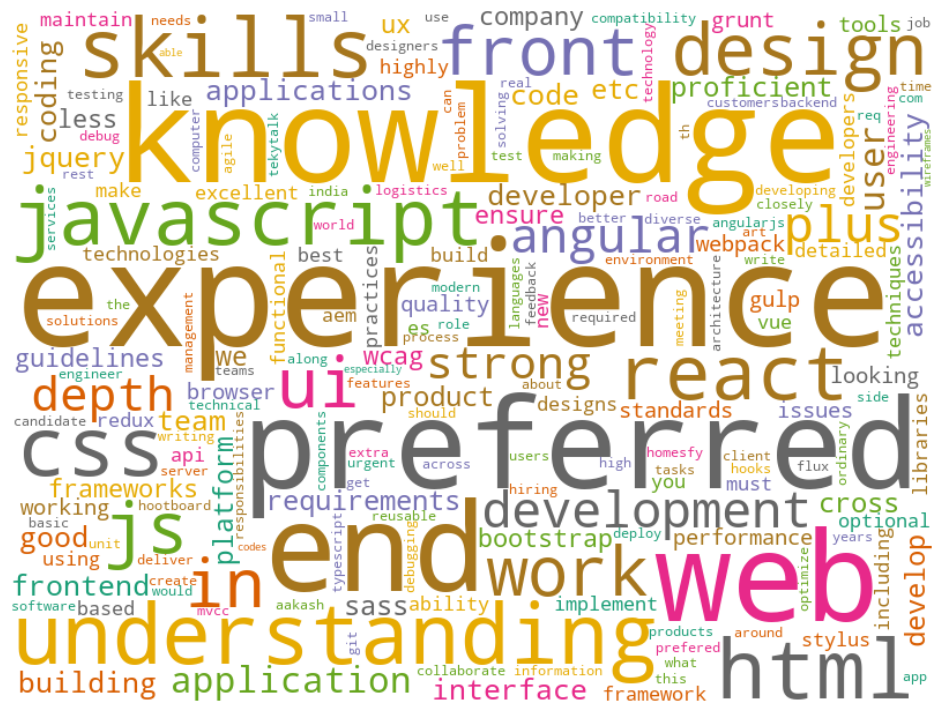

In [26]:
# Create a TF-IDF Vectorizer with specific settings
tfidfvectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=2000)

# Transform the training text data using the TF-IDF Vectorizer
X_train_tfidf = tfidfvectorizer.fit_transform(list(job_advt))

# Get the feature names from the TF-IDF Vectorizer
feature_names = tfidfvectorizer.get_feature_names_out()

# Convert the sparse TF-IDF matrix to a dense matrix and then to a DataFrame
dense_tfidf = X_train_tfidf.todense()
lst2 = dense_tfidf.tolist()
df_tfidf = pd.DataFrame(lst2, columns=feature_names)

# Generate a Word Cloud based on TF-IDF weighted word frequencies
Cloud_tfidf = WordCloud(background_color="white", 
                        colormap='Dark2',
                        width=800,
                        height=600,
                        max_words=200).generate_from_frequencies(df_tfidf.T.sum(axis=1).sort_values())

# Create a figure for the TF-IDF Word Cloud
ch = plt.figure(figsize=(12, 9))

# Display the Word Cloud with appropriate settings
plt.imshow(Cloud_tfidf, interpolation='bilinear')
plt.axis("off")

# Save the TF-IDF Word Cloud as an image
plt.savefig('word_cloud.png')

# Show the TF-IDF Word Cloud
plt.show()

In [28]:
############ reduing components on eucl distance metrics for visualisation #######
df_tfidf_t = df_tfidf.transpose()

pca = decomposition.PCA(n_components=1)
pca.fit(df_tfidf_t)
df_fc_cleaned_reduced_euc = pd.DataFrame(pca.transform(df_tfidf_t).transpose(), 
                                              index = ['PC_1'],
                                              columns = df_tfidf_t.transpose().columns)
df_fc_cleaned_reduced_euc_t = df_fc_cleaned_reduced_euc.transpose()

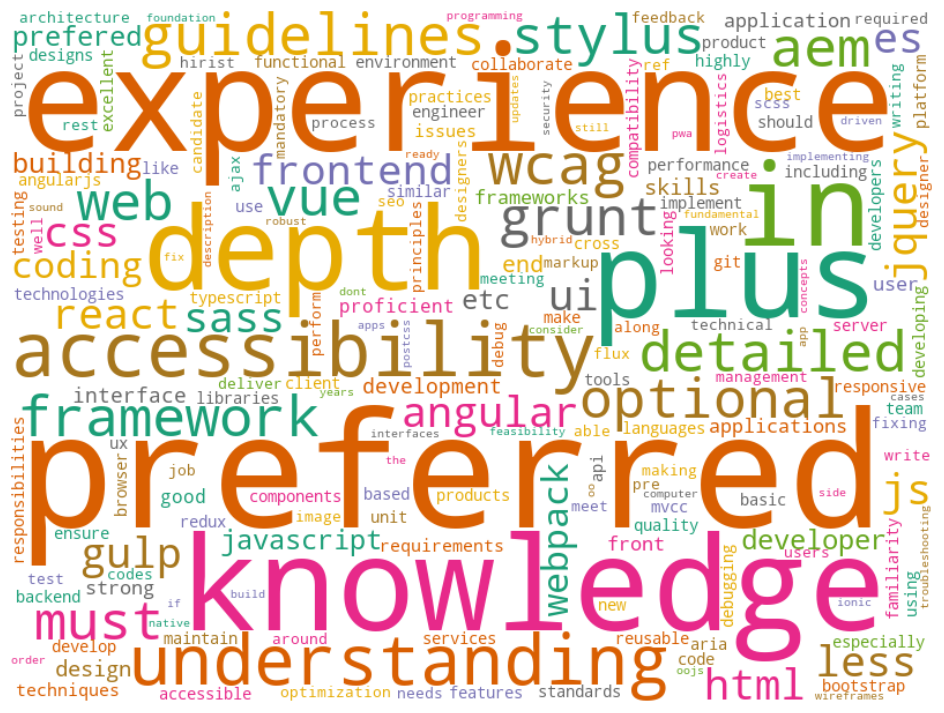

In [29]:
# Generate a Word Cloud based on TF-IDF weighted word frequencies
Cloud_tfidf = WordCloud(background_color="white", 
                        max_words=200,
                        width=800,
                        height=600,
                        colormap='Dark2').generate_from_frequencies(df_fc_cleaned_reduced_euc_t.sum(axis=1))

# Create a figure for the TF-IDF Word Cloud
ch = plt.figure(figsize=(12, 9))

# Display the Word Cloud with appropriate settings
plt.imshow(Cloud_tfidf, interpolation='bilinear')
plt.axis("off")

# Save the TF-IDF Word Cloud as an image
plt.savefig('word_cloud.png')

# Show the TF-IDF Word Cloud
plt.show()

# Example results using 2 pages on data (apprx 50 job descriptions)

## Front End Developer

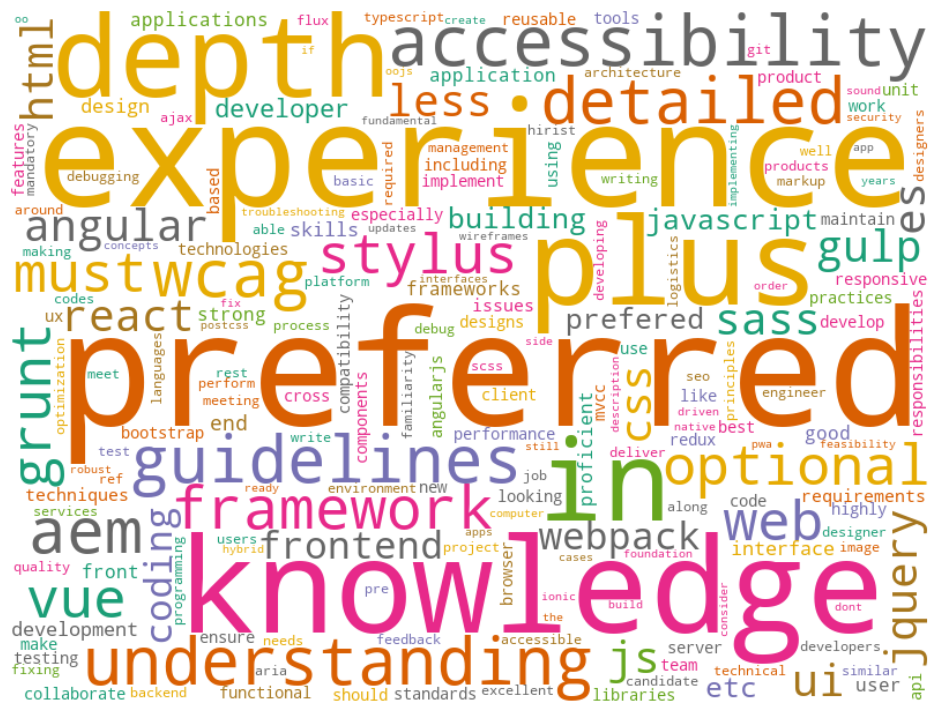

## golang developer

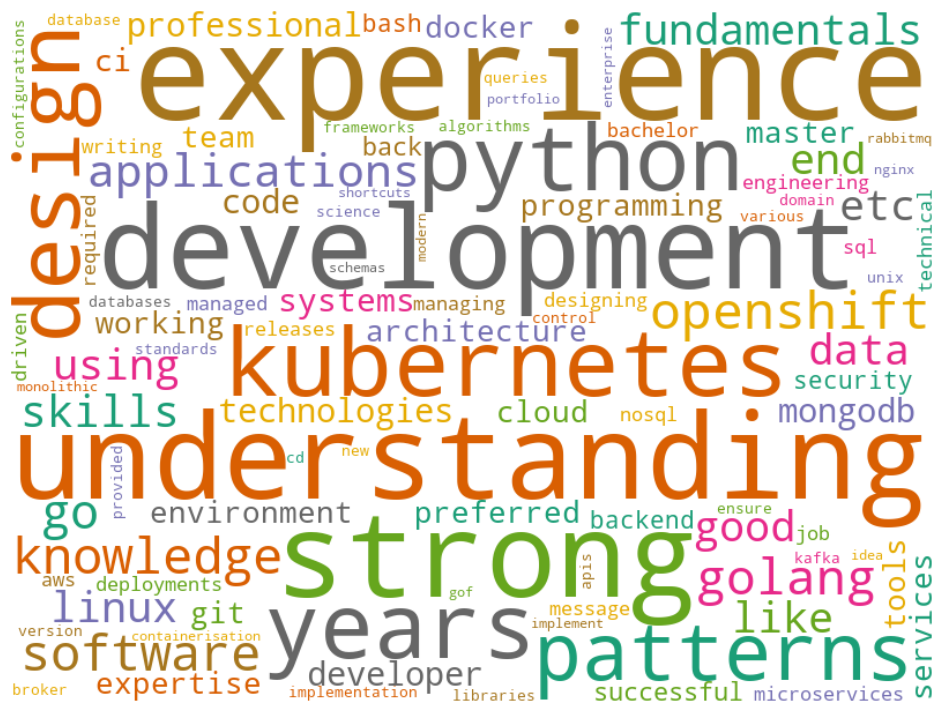

## data scientist 

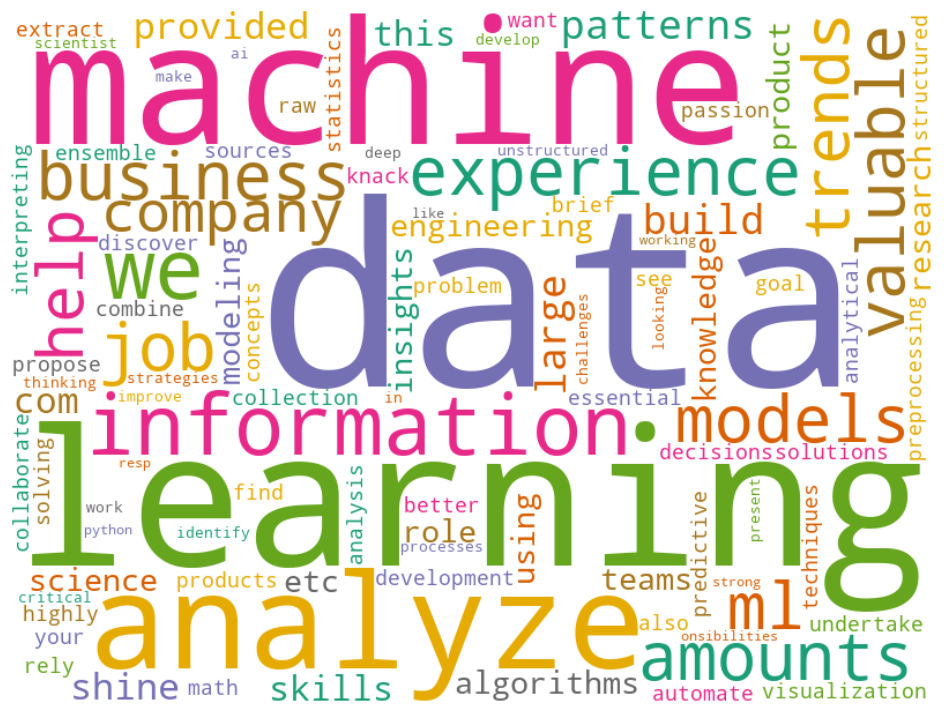

## Applied Scientist
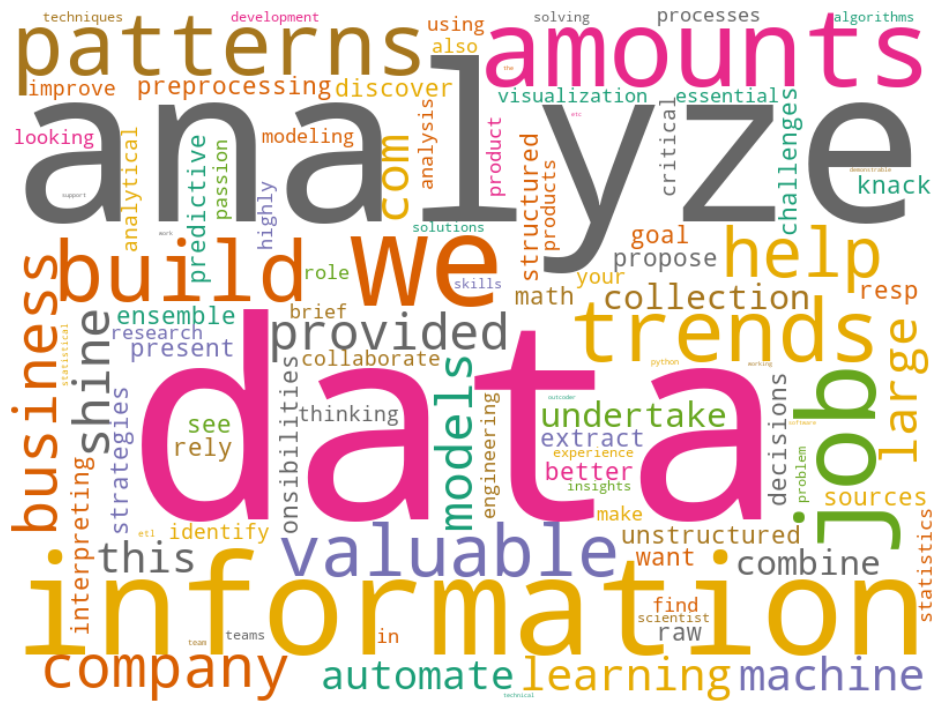